# Dynamic chaos in the kicked “photon-qubit atom"

## Plot mapping for system

In [3]:
import numpy as np
import math as mp
import matplotlib as mpl
import matplotlib.pyplot as plt
import imageio
import qutip
from tqdm import trange, notebook
from time import sleep
from odeintw import odeintw
from pylab import *
from matplotlib import cm


#  define system of motion equations 
def func(z,t):
    p, q, u, v = z
    return [-w**2 * q - ge * (np.conj(u) * v + u * np.conj(v)), p, 
            ((w2 / 2) * u + ge * q * v)/1j, (-(w2 / 2) * v + ge * q * u)/1j]


#  initial conditions
#-----------------------
w = 1                  #  photonic field frequency
w2 = w                 #  qubit frequency
r = 0.33                #  frequency ratio
Tk = 2 * np.pi *r / w  #  period of an external driving force 
T = Tk
Tq = 2 * Tk           # pulse repetition period

ge = 0.002              #  coupling parameter
f0 = 5.0               #  external driving force amplitude
q0 = 1                 #  initial coordinate
p0 = 1                 #  initial impulse
u0 = np.sqrt(1/3)   #  initial spinor component U
v0 = np.sqrt(2/3)      #  initial spinor component V

n_steps = 100        #  number of periods

print('Tk = ', Tk)
print('Tq = ', Tq)


Q = np.zeros(n_steps + 1, dtype=complex) 
P = np.zeros(n_steps + 1, dtype=complex)    
U = np.zeros(n_steps + 1, dtype=complex)   
V = np.zeros(n_steps + 1, dtype=complex)

P[0] = p0
Q[0] = q0
U[0] = u0
V[0] = v0

mxsteps = n_steps  #  step number in solving diff. equation

if n_steps <= 1000:
    mxsteps = 1000

#  mapping for (p, q, u, v)
for n in notebook.tqdm(range(1, n_steps + 1)):

    tn = Tq * (n - 1)
    
    p0 = P[n - 1] + f0
    q0 = Q[n - 1]    
    u0 = U[n - 1]*np.exp(- 1j * w2 * Tq / 2)
    v0 = V[n - 1]*np.exp(1j * w2 * Tq / 2)
    
    z0 = [p0, q0, u0, v0]

    sol = odeintw(func, z0, [tn ,tn + Tq], atol=1e-12, rtol=1e-10, mxstep=mxsteps)
    #print(sol)
    P[n] = sol[-1,0]
    Q[n] = sol[-1,1]
    U[n] = sol[-1,2]
    V[n] = sol[-1,3]
#print(P)

Tk =  2.0734511513692637
Tq =  4.1469023027385274


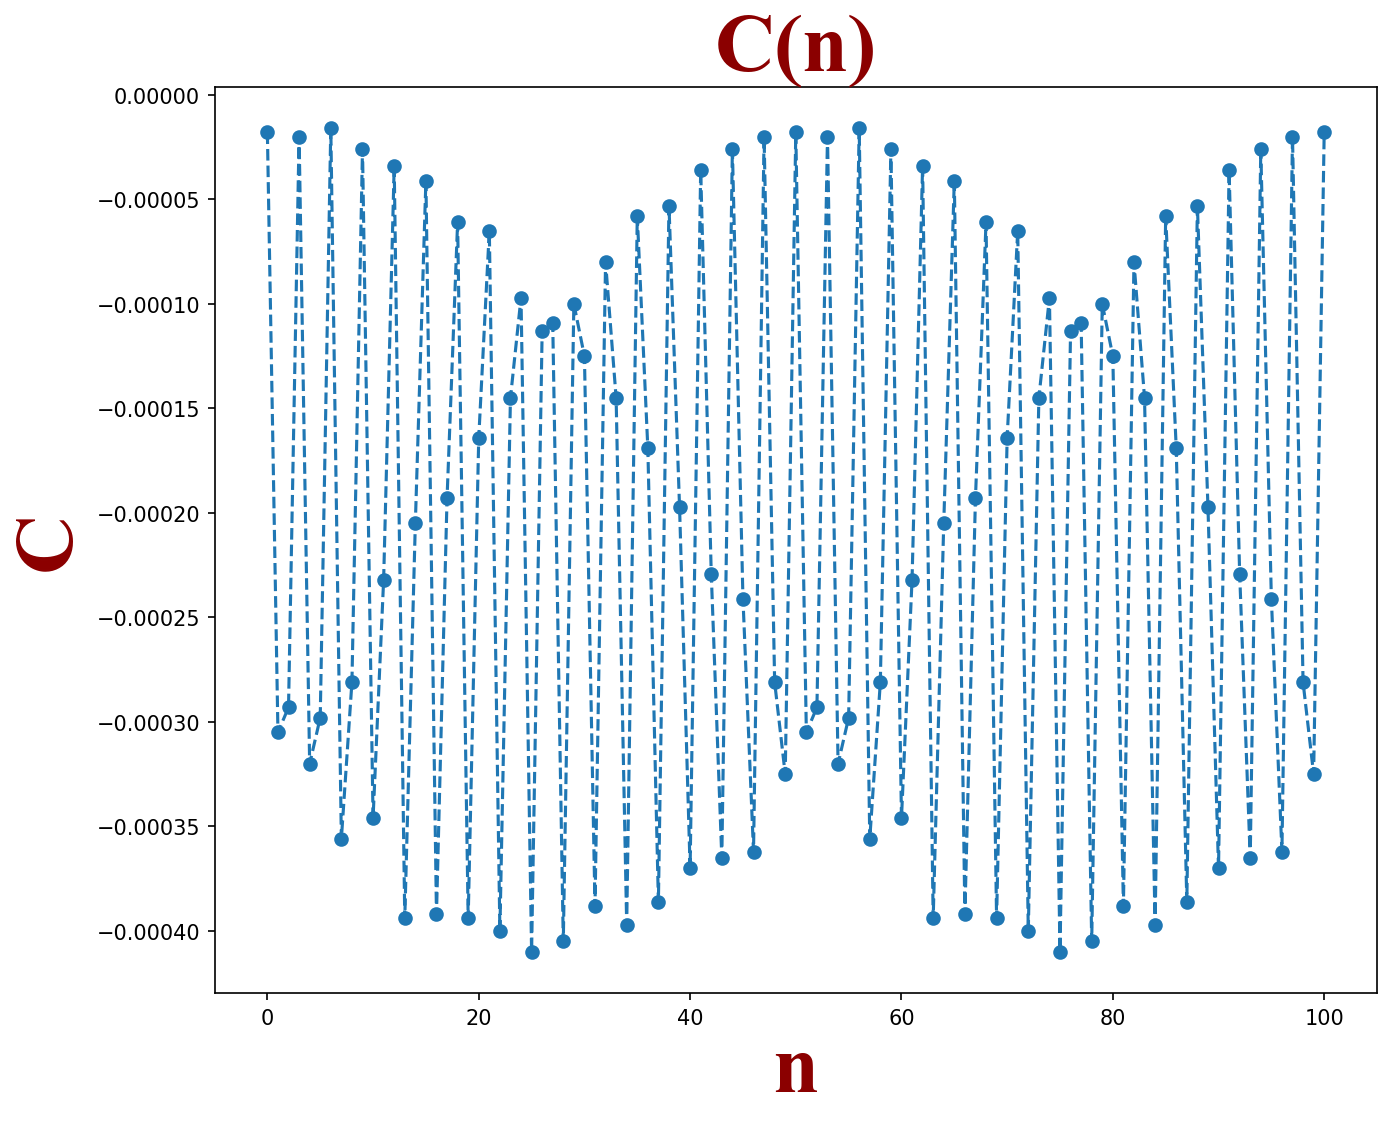

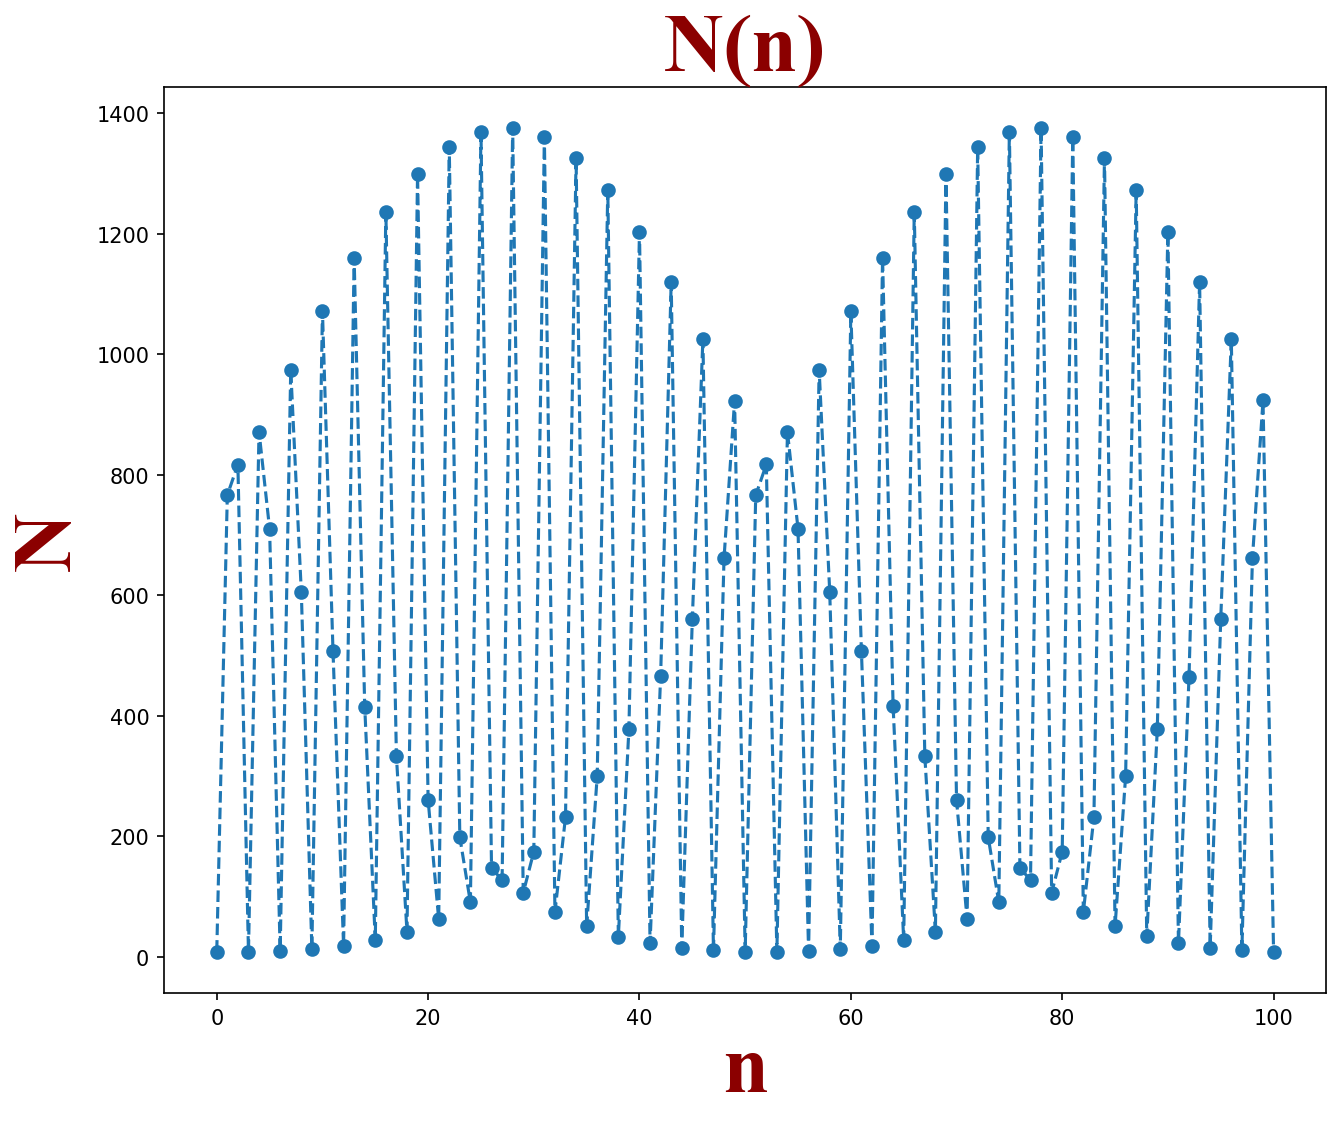

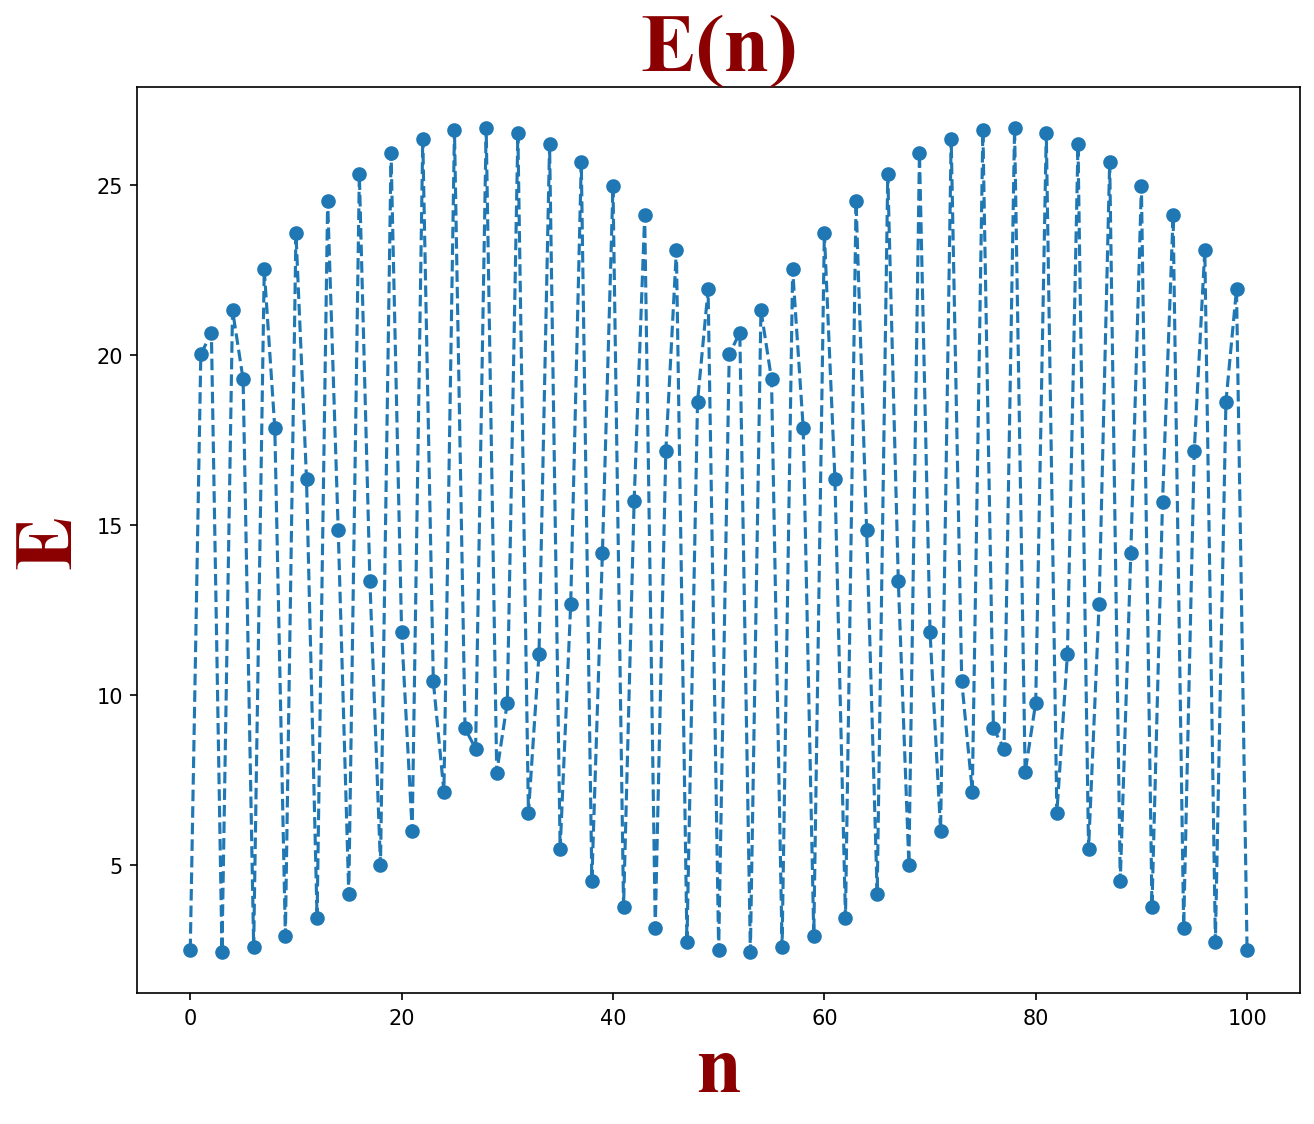

In [4]:
#  integrals of motion

font = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

fontTitle = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

sigma_x = [[0, 1], [1, 0]]
sigma_y = [[0, -1j], [1j, 0]]
sigma_z = [[1, 0], [0, 1]]
ident = np.identity(2, dtype=complex)

C = [np.sqrt(2 * w) * ge * np.dot(sigma_x, q) - np.sqrt(2 / w) * ge * np.dot(sigma_y, p) for q, p in zip(Q,P)]
N = [np.sqrt(w / 2) * np.dot(q**2, ident) + np.sqrt(1 / (2 * w)) * np.dot(p**2, ident) +
     np.dot(1/2, ident) + sigma_z for q, p in zip(Q,P)]
Ep = [(1/2) * w + (w / 2 * q**2 + p**2 / w / 2 + 1) * w 
      + ge * np.sqrt(w / 2 * q**2 + p**2 / w / 2 + 1) for q, p in zip(Q,P)]
Em = [(1/2) * w + (w / 2 * q**2 + p**2 / w / 2 + 1) * w 
      - ge * np.sqrt(w / 2 * q**2 + p**2 / w / 2 + 1) for q, p in zip(Q,P)]

C = np.round(C, 3)
N = np.round(N, 3)
Ep = np.round(Ep, 3)


fig = plt.figure(figsize=(10,8), dpi=150)
plt.plot(np.linalg.det(abs(np.asarray(C))), '--o')
plt.xlabel('n', fontdict=font)
plt.ylabel('C', fontdict=font)
plt.title('C(n)', fontdict=fontTitle)
plt.show()
fig.savefig('oscillator_C,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)

fig = plt.figure(figsize=(10,8), dpi=150)
plt.plot(np.linalg.det(abs(np.asarray(N))), '--o')
plt.xlabel('n', fontdict=font)
plt.ylabel('N', fontdict=font)
plt.title('N(n)', fontdict=fontTitle)
plt.show()
fig.savefig('oscillator_N,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)

fig = plt.figure(figsize=(10,8), dpi=150)
plt.plot(abs(np.asarray(Ep)), '--o')
plt.xlabel('n', fontdict=font)
plt.ylabel('E', fontdict=font)
plt.title('E(n)', fontdict=fontTitle)
plt.show()
fig.savefig('oscillator_E,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)

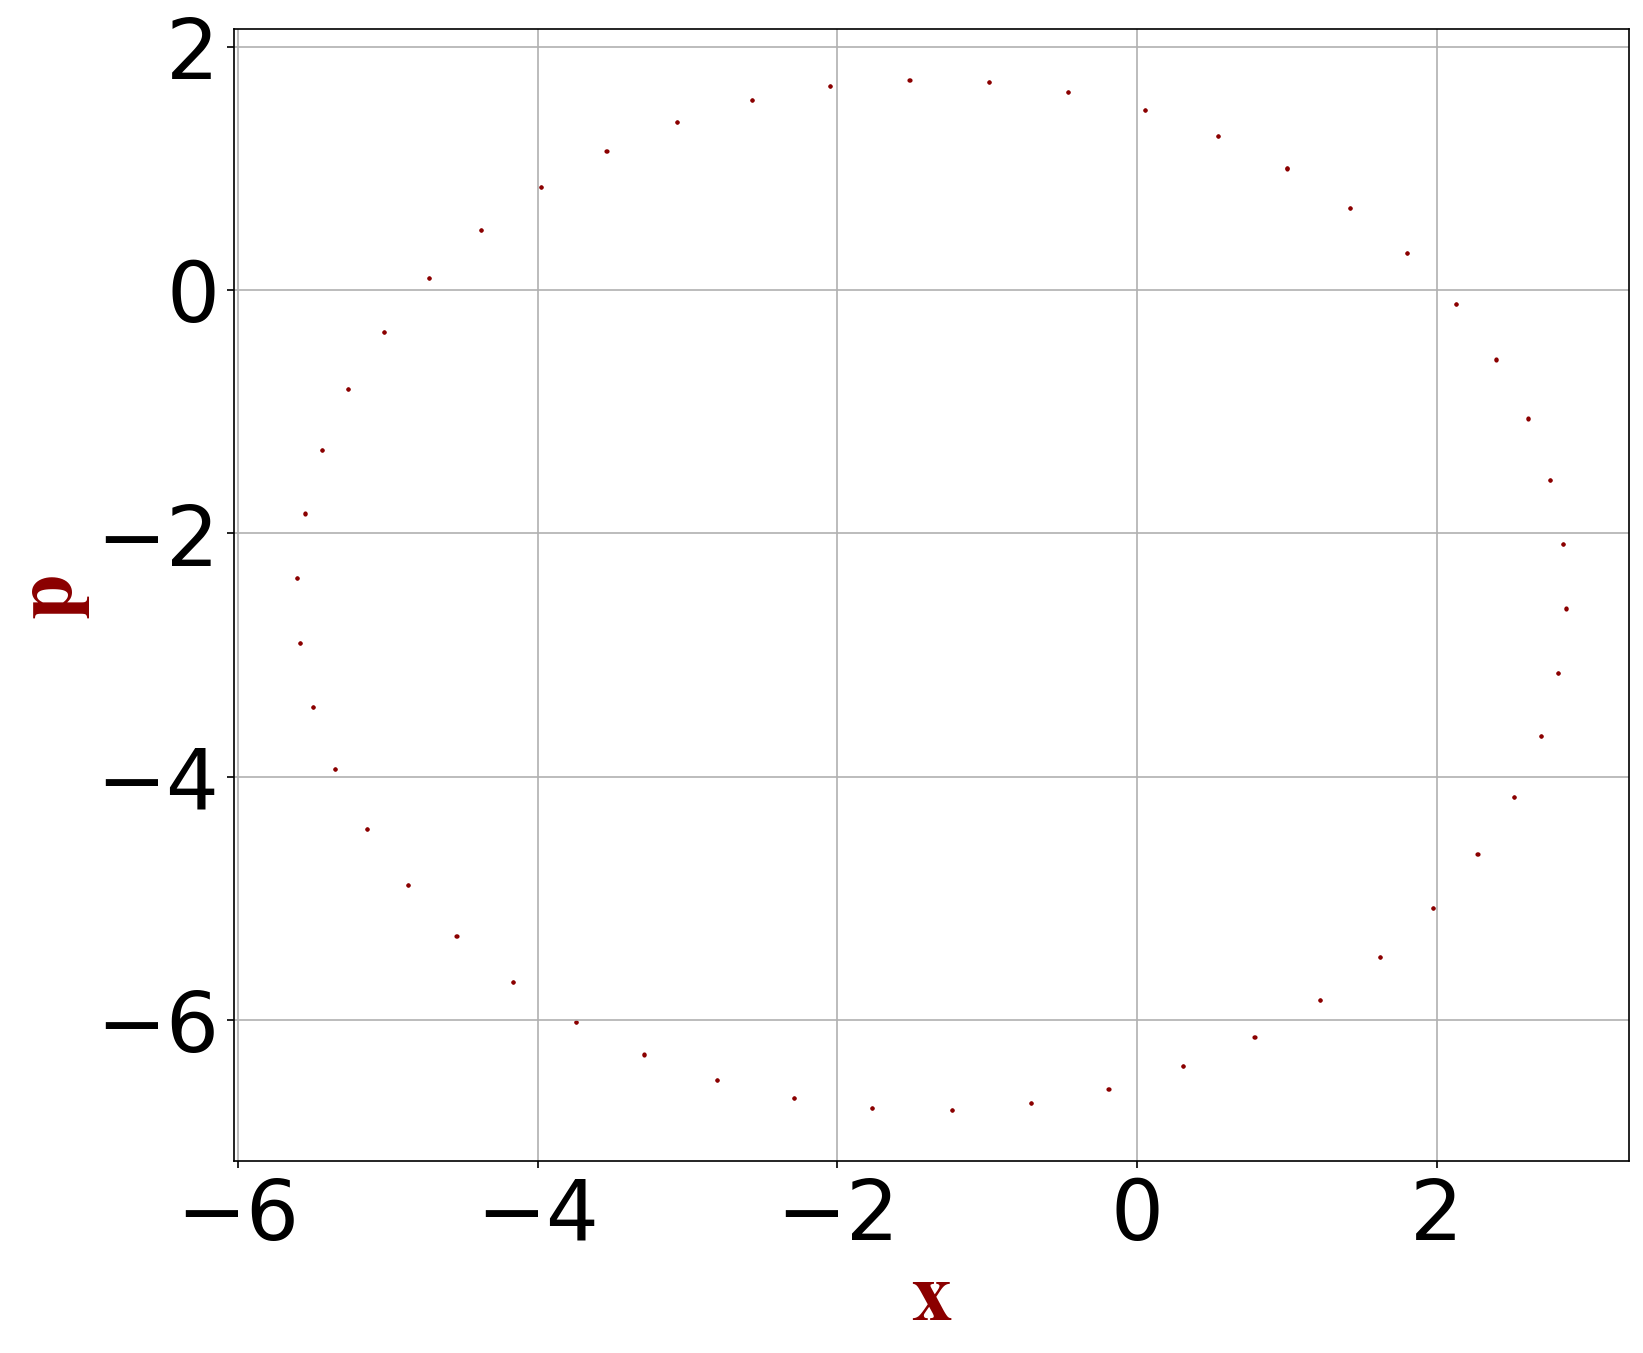

In [5]:
#  plot for (p, x)
fig = plt.figure(figsize=(12,10), dpi=150)

font = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

fontTitle = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

plt.xlabel('x', fontdict=font)
plt.ylabel('p', fontdict=font)

plt.scatter(Q.real,P.real, s=1, c='darkred')
plt.tick_params(labelsize=40)
plt.grid()
plt.show()
fig.savefig('qubit_px,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)

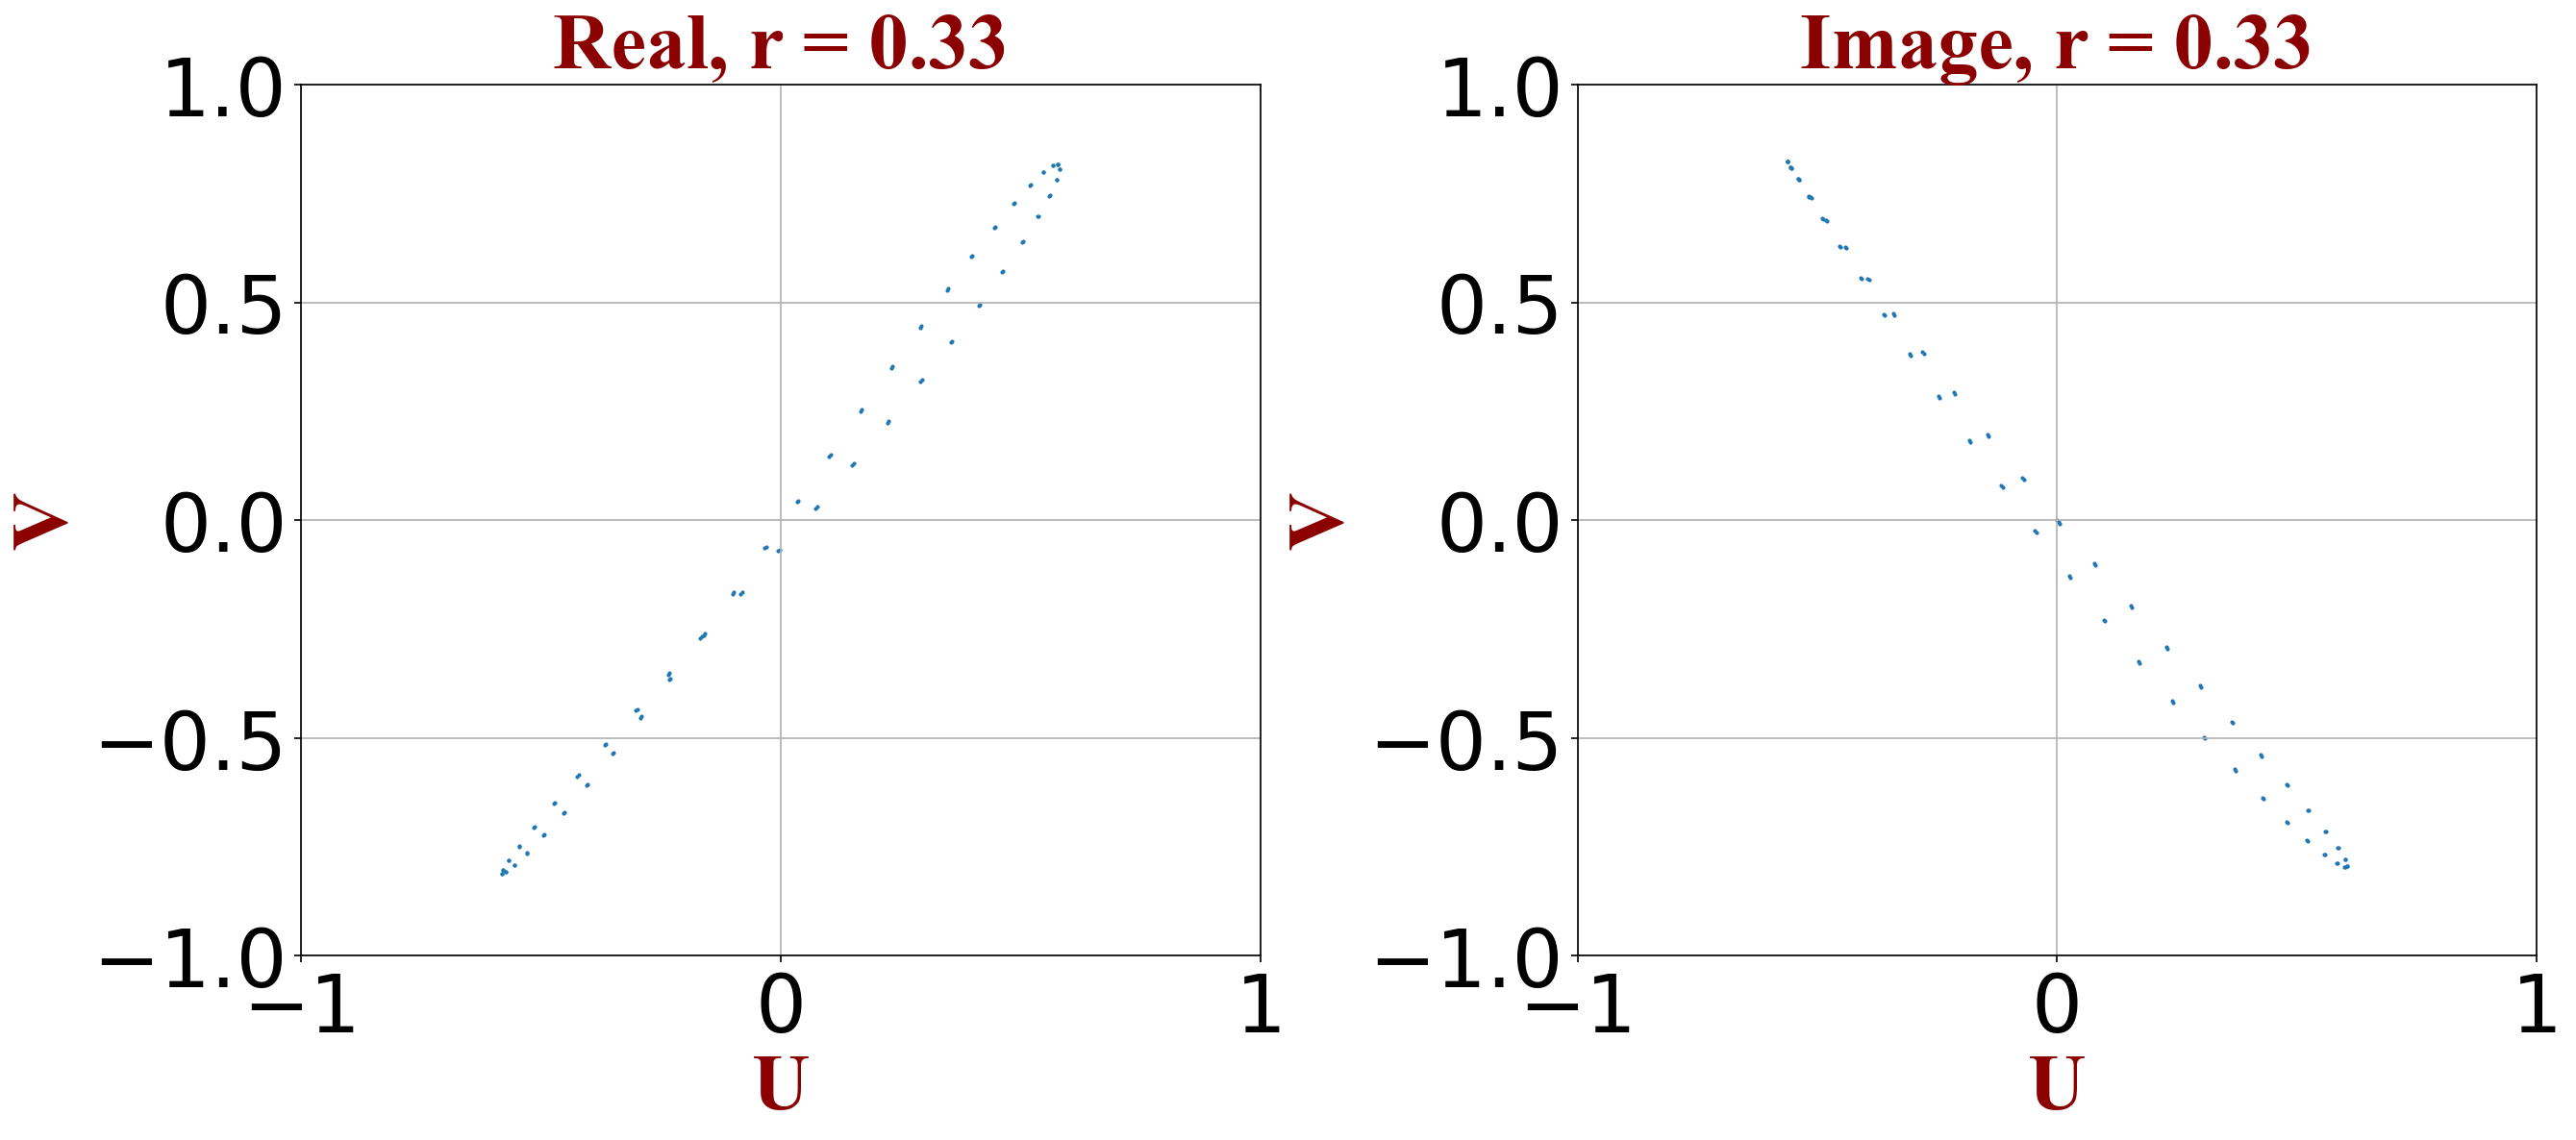

last norm:  1.0


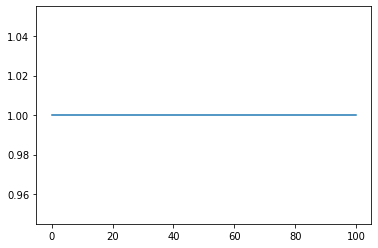

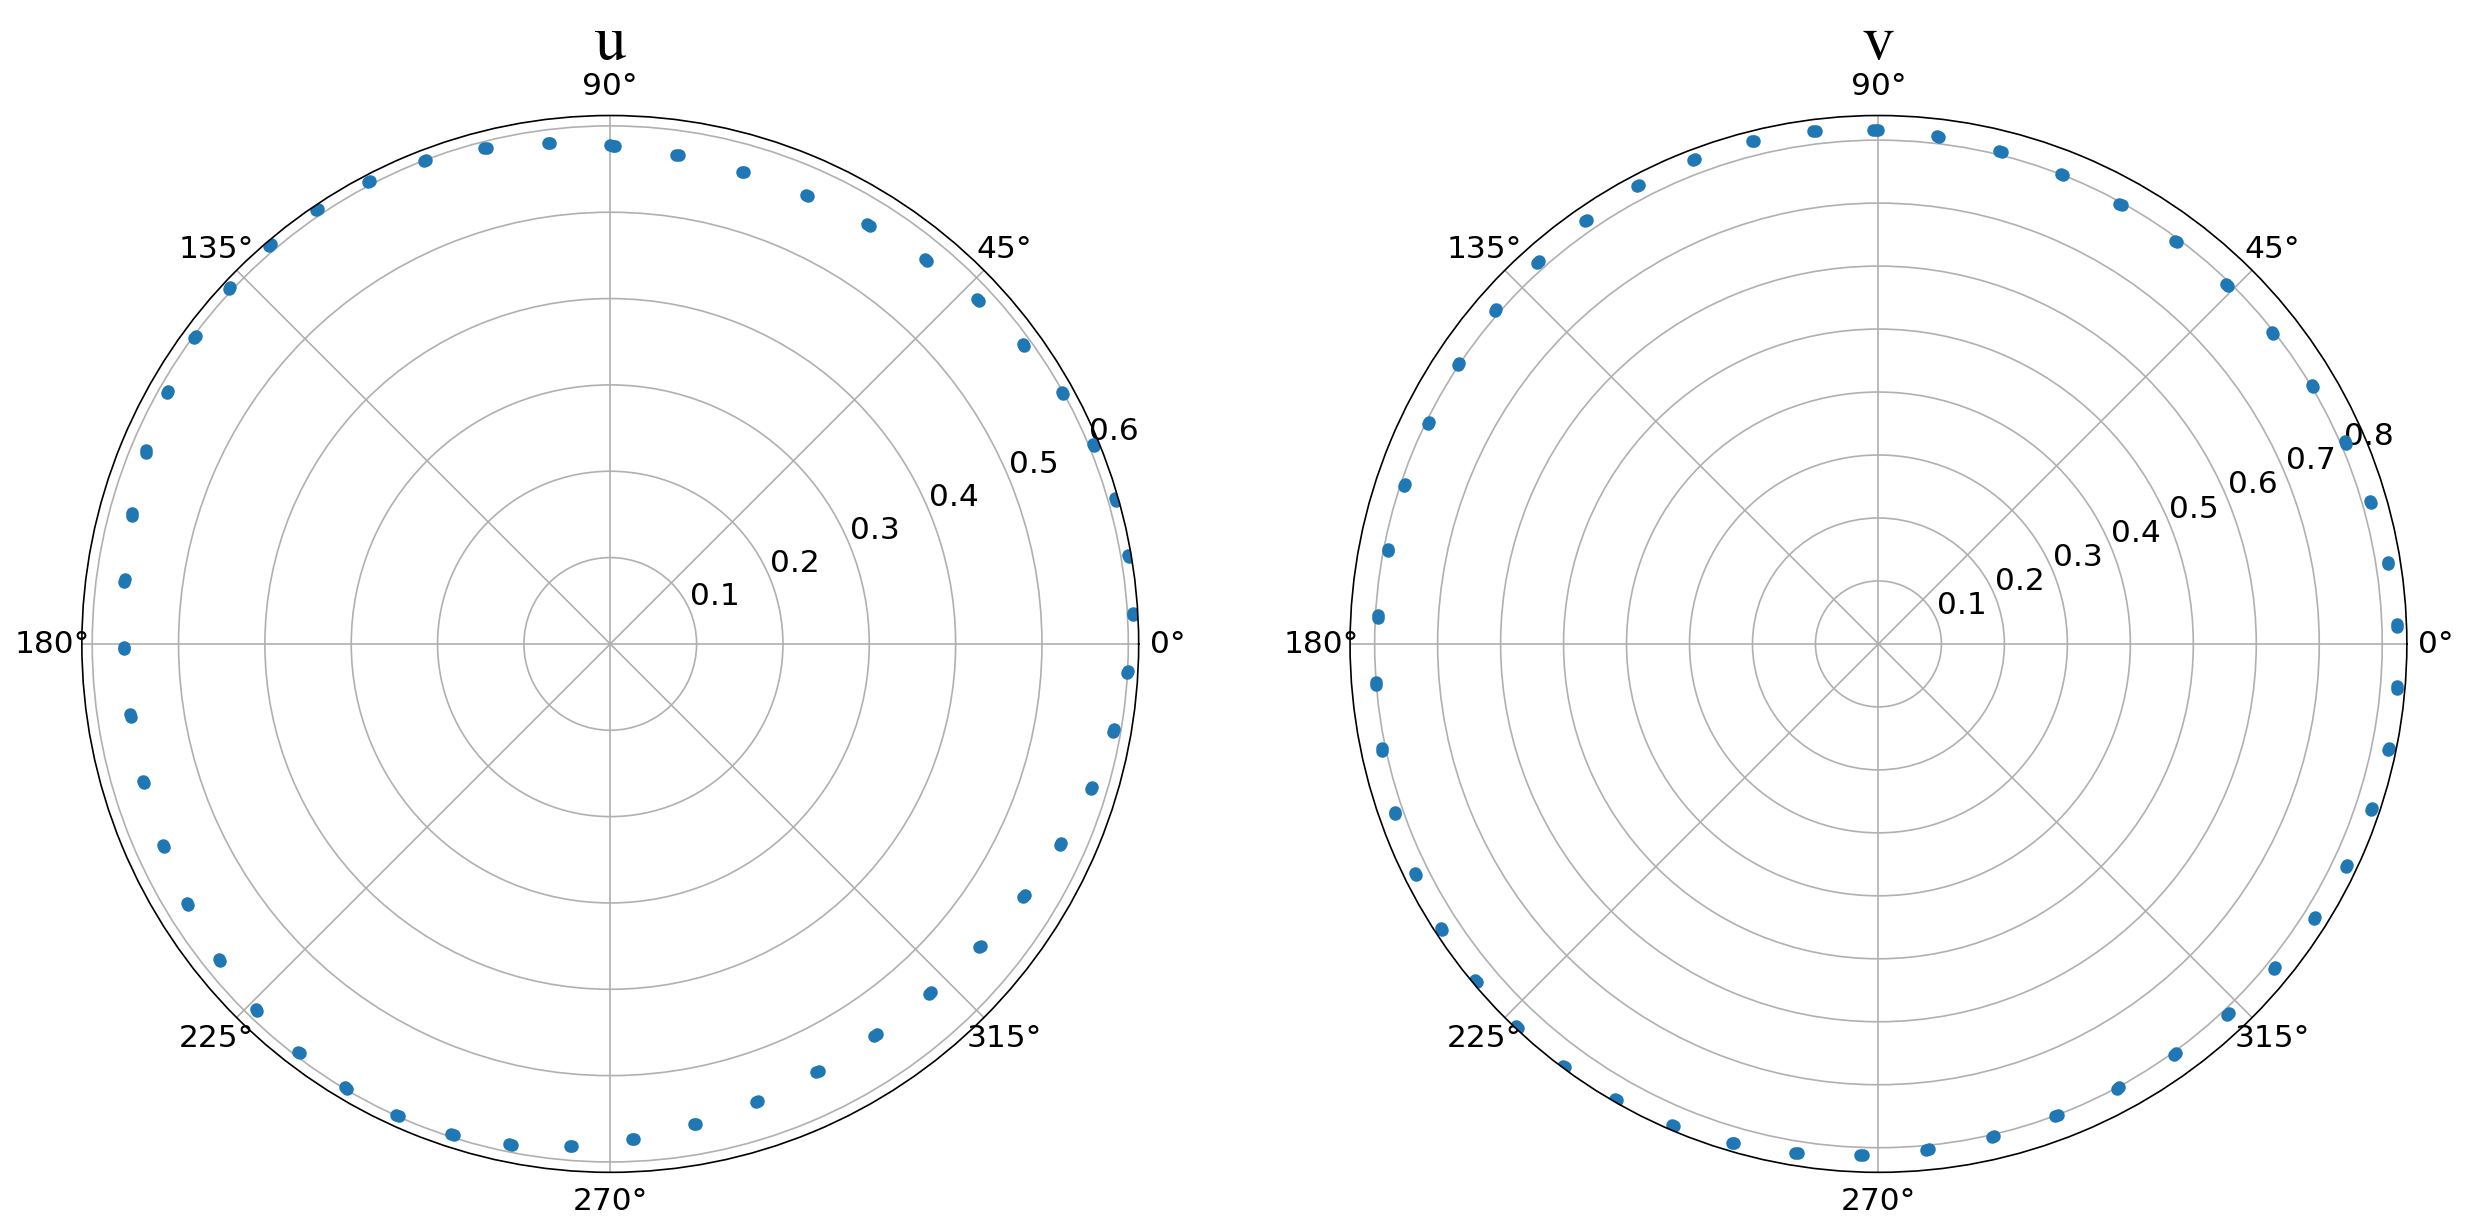

In [6]:
#  plot for (u, v)
fig = plt.figure(figsize=(20, 8), dpi=150)
fig.subplots_adjust(wspace=0.33)

font = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

fontTitle = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sc1 = ax1.scatter(U.real,V.real, s=1)
sc2 = ax2.scatter(U.imag,V.imag, s=1)

limit=np.max(np.ceil(np.absolute(U))) # set limits for axis
ax1.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)
ax2.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)

ax1.set_xlabel('U', fontdict=font)
ax1.set_ylabel('V', fontdict=font)
ax2.set_xlabel('U', fontdict=font)
ax2.set_ylabel('V', fontdict=font)

ax1.set_title('Real, r = ' + str(r), fontdict=fontTitle)
ax1.grid()
ax1.tick_params(labelsize=40)
ax2.set_title('Image, r = ' + str(r), fontdict=fontTitle)
ax2.tick_params(labelsize=40)
ax2.grid()

plt.show()

#  plot for (u, v)
fig1 = plt.figure(figsize=(10,8), dpi=150)
limit=np.max(np.ceil(np.absolute(U))) # set limits for axis
plt.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)

plt.scatter(U.real,V.real, s=1)
plt.xlabel('U', fontdict=font)
plt.ylabel('V', fontdict=font)
plt.title('Real', fontdict=fontTitle)
plt.grid()
plt.tick_params(labelsize=40)
fig1.savefig('qubit_uv_re,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)
plt.close(fig1)

fig2 = plt.figure(figsize=(10,8), dpi=150)
limit=np.max(np.ceil(np.absolute(U))) # set limits for axis
plt.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)
plt.scatter(U.imag,V.imag, s=1)
plt.xlabel('U', fontdict=font)
plt.ylabel('V', fontdict=font)
plt.title('Image', fontdict=fontTitle)
plt.tick_params(labelsize=40)
plt.grid()

fig2.savefig('qubit_uv_im,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)
plt.close(fig2)

#  norm of the spinor (u, v).T
ss = []
for i in range(len(U)):
    ss.append(np.sqrt(abs(U[i])**2 + abs(V[i])**2))
    
ss = np.round(ss, 4)
plt.plot(ss)

print('last norm: ', ss[-1])


#  polar plot for u(r, angle) and v(r, angle)
angleU = list(map(lambda x: mp.atan2(x.real, x.imag), U))
radU = abs(U)
angleV = list(map(lambda x: mp.atan2(x.real, x.imag), V))
radV = abs(V)

fig = plt.figure(figsize=(20, 10), dpi=150)
fig.subplots_adjust(wspace=0.2)
plt.rcParams.update({'font.size': 15})
ax1 = fig.add_subplot(121, polar=True)
ax2 = fig.add_subplot(122, polar=True)

sc1 = ax1.plot(angleU, radU, marker='o', markersize=5, linestyle = 'None')
sc2 = ax2.plot(angleV, radV, marker='o', markersize=5, linestyle = 'None')

ax1.set_title('u', fontname='Times New Roman', size=30)
ax2.set_title('v', fontname='Times New Roman', size=30)
plt.show()

fig = plt.figure(figsize=(10,8), dpi=300)
plt.polar(angleU, radU, marker='o', markersize=5, linestyle = 'None')
plt.title('u', fontdict=fontTitle)
plt.tick_params(labelsize=40, labelcolor='darkred')
plt.yticks([radU[-1]])
fig.savefig('qubit_polaru,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)
plt.close(fig)


fig = plt.figure(figsize=(10,8), dpi=300)
plt.polar(angleV, radV, marker='o', markersize=5, linestyle = 'None')
plt.title('v', fontdict=fontTitle)
plt.tick_params(labelsize=40, labelcolor='darkred')
plt.yticks([radV[-1], radU[0]])
fig.savefig('qubit_polarv,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)
plt.close(fig)

## Plot Bloch sphere for qubit

CPU times: user 1.83 s, sys: 122 ms, total: 1.95 s
Wall time: 1.6 s


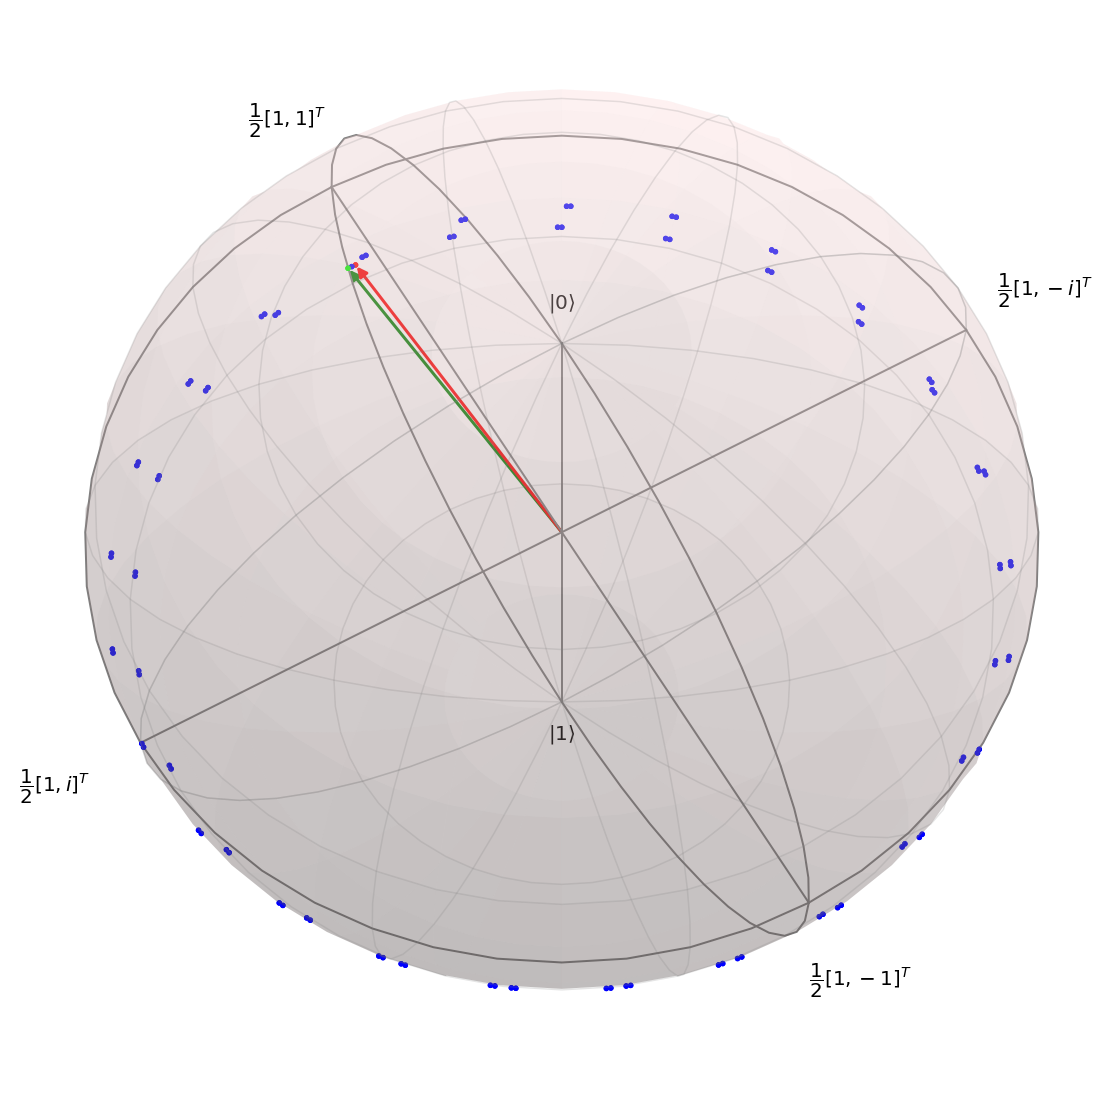

In [7]:
%%time
thett = np.array([complex(np.arcsin(2 * u * v)) for u, v in zip(U, V)])
phii = np.array([complex(-2j * np.log(u / np.cos(complex(np.arcsin(2 * u * v))/2))) for u, v in zip(U, V)])

#print(U[1])
#print(np.cos(thett[1]/2)*np.exp(1j * phii[1]/2))
#print(V[1])
#print(np.sin(thett[1]/2)*np.exp(-1j * phii[1]/2))

states = list(map(lambda theta, phi: qutip.Qobj([[np.cos(theta/2)*np.exp(1j * phi/2)],[np.sin(theta/2)*np.exp(-1j * phi/2)]]).unit(), 
             thett, phii))


#plt.plot([np.sqrt(sum(abs(np.asarray(states[i]))**2)) for i in range(len(states))], 'o', markersize=1)
#plt.show()

colors = ['blue' for i in range(len(states))]
colors[-1] = 'red'
colors[0] = 'lime'
#print(colors)

b = qutip.Bloch(figsize=(15,15))


## customize sphere properties ##
b.point_color = colors # options: 'r', 'g', 'b' etc.
b.vector_color = ['green', 'red']
b.point_marker = ['o']
b.point_size = [20]
b.xlabel = ['$ \dfrac{1}{2} [1, 1]^T $', '$ \dfrac{1}{2} [1, -1]^T $']
b.ylabel = ['$ \dfrac{1}{2} [1, i]^T $', '$ \dfrac{1}{2} [1, -i]^T $']
b.frame_width = 2

b.add_states([states[0], states[-1]])
b.add_states(states, 'point')

b.view = [60, 60]

b.render()

bb = b.fig
bb.savefig('qubitBloch,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png',dpi=150)

In [ ]:
b = qutip.Bloch3d()

## customize sphere properties ##
b.point_color = colors # options: 'r', 'g', 'b' etc.
b.vector_color = ['red', 'green']
b.point_marker = ['o']
b.point_size = 0.04
b.size = [600,600]
#b.xlabel = ['$ \dfrac{1}{2} [1, 1]^T $', '$ \dfrac{1}{2} [1, -1]^T $']
#b.ylabel = ['$ \dfrac{1}{2} [1, i]^T $', '$ \dfrac{1}{2} [1, -i]^T $']
#b.frame_width = 2

b.view = [240, -420]
b.add_states(states, 'point')
b.add_states([states[0], states[-1]], 'vector')

b.show()

In [ ]:
%%time
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image, HTML

#%matplotlib notebook 

fig = plt.figure(figsize=(15,15), dpi=100)
ax = Axes3D(fig, azim=60,elev=60)
sphere = qutip.Bloch(fig, ax)

def animate(i):
    sphere.clear()
    sphere.add_states(states[0], 'vector')
    sphere.add_states(states[i])
    sphere.add_states(states[:i+1], 'point')
    sphere.frame_width = 2
    sphere.vector_width = 2
    
    
    sphere.make_sphere()
    fig.set_rasterized(True)
    return ax

def init():
    sphere.vector_color = ['r']
    sphere.xlabel = ['$ \dfrac{1}{2} [1, 1]^T $', '$ \dfrac{1}{2} [1, -1]^T $']
    sphere.ylabel = ['$ \dfrac{1}{2} [1, i]^T $', '$ \dfrac{1}{2} [1, -i]^T $']
    sphere.point_marker = ['o']
    sphere.point_color = colors
    sphere.point_size = [25]
    sphere.vector_color = ['red']
    return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(states)), init_func=init, repeat=False, 
                              blit=False)
plt.close()

ani.save('qubit_bloch_sphere.gif', fps=10)
Image(url='qubit_bloch_sphere.gif')

#HTML(ani.to_jshtml())